In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
data = pd.read_csv("dirty_cafe_sales.csv")
data.head()

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4,1.0,ERROR,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2,5.0,10.0,UNKNOWN,UNKNOWN,2023-04-27
4,TXN_3160411,Coffee,2,2.0,4.0,Digital Wallet,In-store,2023-06-11


In [3]:
data.shape

(10000, 8)

In [4]:
data.columns

Index(['Transaction ID', 'Item', 'Quantity', 'Price Per Unit', 'Total Spent',
       'Payment Method', 'Location', 'Transaction Date'],
      dtype='object')

In [5]:
print(data.dtypes)

Transaction ID      object
Item                object
Quantity            object
Price Per Unit      object
Total Spent         object
Payment Method      object
Location            object
Transaction Date    object
dtype: object


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    10000 non-null  object
 1   Item              9667 non-null   object
 2   Quantity          9862 non-null   object
 3   Price Per Unit    9821 non-null   object
 4   Total Spent       9827 non-null   object
 5   Payment Method    7421 non-null   object
 6   Location          6735 non-null   object
 7   Transaction Date  9841 non-null   object
dtypes: object(8)
memory usage: 625.1+ KB


In [7]:
data.describe()

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
count,10000,9667,9862,9821,9827,7421,6735,9841
unique,10000,10,7,8,19,5,4,367
top,TXN_9226047,Juice,5,3.0,6.0,Digital Wallet,Takeaway,UNKNOWN
freq,1,1171,2013,2429,979,2291,3022,159


In [8]:
data.describe().T

,count,unique,top,freq
Transaction ID,10000,10000,TXN_9226047,1
Item,9667,10,Juice,1171
Quantity,9862,7,5,2013
Price Per Unit,9821,8,3.0,2429
Total Spent,9827,19,6.0,979
Payment Method,7421,5,Digital Wallet,2291
Location,6735,4,Takeaway,3022
Transaction Date,9841,367,UNKNOWN,159


In [9]:
print(data.isnull().sum())

Transaction ID         0
Item                 333
Quantity             138
Price Per Unit       179
Total Spent          173
Payment Method      2579
Location            3265
Transaction Date     159
dtype: int64


In [10]:
# Convert Quantity and Price Per Unit to numeric

data['Quantity'] = pd.to_numeric(data['Quantity'], errors='coerce')
data['Price Per Unit'] = pd.to_numeric(data['Price Per Unit'], errors='coerce')

In [11]:
# Recalculate Total Spent where missing

data['Total Spent'].fillna(data['Quantity'] * data['Price Per Unit'], inplace=True)

In [12]:
# Replace invalid Payment Method values

data['Payment Method'].replace(['ERROR','UNKNOWN'], pd.NA, inplace=True)
data['Payment Method'].fillna(data['Location'].mode()[0],inplace=True)

In [13]:
# Replace invalid Location values

data['Location'].replace(['ERROR','UNKNOWN'], pd.NA, inplace=True )
data['Location'].fillna(data['Location'].mode()[0], inplace=True)

In [14]:
# Clean and recalculate Total Spent

data['Total Spent'].replace(['ERROR','UNKNOWN'], pd.NA, inplace=True)
data['Total Spent']= pd.to_numeric(data['Total Spent'], errors='coerce')
data['Total Spent'].fillna(data['Quantity'] * data['Price Per Unit'], inplace=True)


In [15]:
# Fill remaining missing values using statistical measures

data['Item'].fillna(data['Item'].mode()[0], inplace=True)
data['Quantity'].fillna(data['Quantity'].median(), inplace=True)
data['Price Per Unit'].fillna(data['Price Per Unit'].median(), inplace=True)

In [16]:
# Recalculate Total Spent after cleaning

data['Total Spent'] = data['Quantity'] * data['Price Per Unit']

In [17]:
# Fill missing Transaction Date with mode

data['Transaction Date'].fillna(data['Transaction Date'].mode()[0], inplace=True)

In [18]:
print(data.isna().sum())

Transaction ID      0
Item                0
Quantity            0
Price Per Unit      0
Total Spent         0
Payment Method      0
Location            0
Transaction Date    0
dtype: int64


In [19]:
# Outliers are detected using the Interquartile Range (IQR) method.

for col in ['Quantity','Price Per Unit','Total Spent']:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3-Q1
    lower = Q1-1.5*IQR
    upper = Q3+1.5*IQR
    outliers = ((data[col]< lower) | (data[col]>upper)).sum()
    print(f"{col}:{outliers}outliers")
    

    

Quantity:0outliers
Price Per Unit:0outliers
Total Spent:240outliers


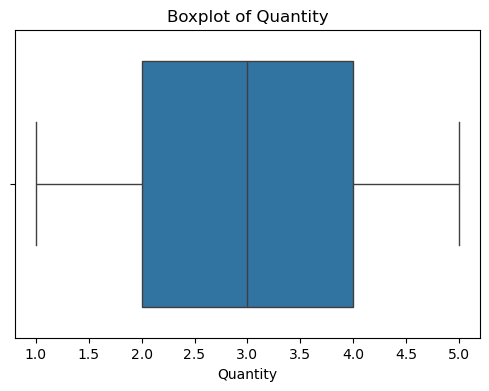

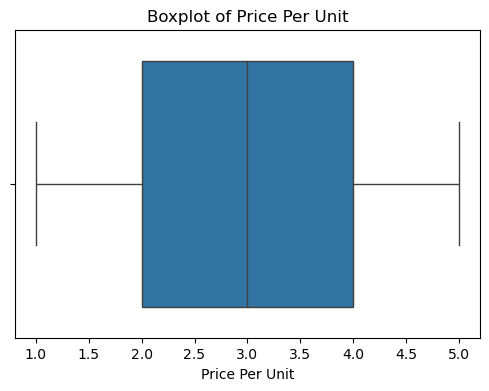

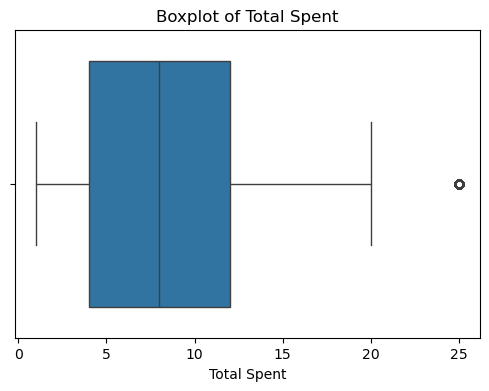

In [20]:
for col in ['Quantity','Price Per Unit','Total Spent']:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=data[col])
    plt.title(f"Boxplot of {col}")
    plt.show

In [21]:
Q1 = data['Total Spent'].quantile(0.25)
Q3 = data['Total Spent'].quantile(0.75)
IQR = Q3-Q1

lower = Q1 - 1.5* IQR
upper = Q3 + 1.5 *IQR
data['Total Spent'] = np.where(
    data ['Total Spent'] > upper,upper,
    np.where(data['Total Spent'] < lower,lower,data['Total Spent']))


In [22]:
data.duplicated().sum()

np.int64(0)

In [23]:
#from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data[['Quantity', 'Price Per Unit', 'Total Spent']] = scaler.fit_transform(
    data[['Quantity', 'Price Per Unit', 'Total Spent']] 
)

In [24]:
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()
data[['Total Spent']] = minmax.fit_transform(data[['Total Spent']])

In [25]:
data['Item'] = data['Item'].str.strip().str.lower()
data['Payment Method'] = data['Payment Method'].str.strip().str.lower()
data['Location'] = data['Location'].str.strip().str.lower()

In [26]:
data['Transaction Date'] = pd.to_datetime(data['Transaction Date'], errors='coerce')
data['Transaction Date'] = data['Transaction Date'].dt.strftime('%Y-%m-%d')

In [27]:
print(data['Payment Method'].unique())
print(data['Location'].unique())
print(data['Transaction Date'].head())

['credit card' 'cash' 'takeaway' 'digital wallet']
['takeaway' 'in-store']
0    2023-09-08
1    2023-05-16
2    2023-07-19
3    2023-04-27
4    2023-06-11
Name: Transaction Date, dtype: object


In [28]:
print(data.isna().sum())

Transaction ID        0
Item                  0
Quantity              0
Price Per Unit        0
Total Spent           0
Payment Method        0
Location              0
Transaction Date    460
dtype: int64


In [29]:
print(data.dtypes)

Transaction ID       object
Item                 object
Quantity            float64
Price Per Unit      float64
Total Spent         float64
Payment Method       object
Location             object
Transaction Date     object
dtype: object


In [30]:
print(data['Item'].unique())
print(data['Payment Method'].unique())
print(data['Location'].unique())

['coffee' 'cake' 'cookie' 'salad' 'smoothie' 'unknown' 'sandwich' 'juice'
 'error' 'tea']
['credit card' 'cash' 'takeaway' 'digital wallet']
['takeaway' 'in-store']


In [31]:
print(data.describe())

           Quantity  Price Per Unit   Total Spent
count  1.000000e+04    1.000000e+04  10000.000000
mean   9.379164e-17   -1.385558e-16      0.344528
std    1.000050e+00    1.000050e+00      0.250729
min   -1.464091e+00   -1.569783e+00      0.000000
25%   -7.418320e-01   -7.658584e-01      0.130435
50%   -1.957321e-02    3.806581e-02      0.304348
75%    7.026856e-01    8.419901e-01      0.478261
max    1.424944e+00    1.645914e+00      1.000000


In [32]:
data['Transaction Date'].fillna(data['Transaction Date'].mode()[0], inplace=True)
data.to_csv('Cleaned_Final_DataSet.csv', index=False)